 # **<font color="lightblue">Introducción a Datos Espaciales</font>**

<p align="justify">
El análisis de datos espaciales juega un papel fundamental en diversas áreas, desde la planificación urbana, la economía regional, el análisis ambiental y la geografía. Con el creciente interés en la recopilación y el análisis de información geoespacial, Python se ha convertido en una herramienta poderosa para el manejo y procesamiento de datos espaciales.
<br><br>
Una de las librerías más destacadas para trabajar con datos geoespaciales en Python es <code>shapely</code>. <code>shapely</code> es una biblioteca de código abierto que permite realizar operaciones geométricas y topológicas en objetos espaciales. Con <code>shapely</code>, los usuarios pueden manipular, analizar y visualizar datos geográficos de manera sencilla y eficiente.
<br><br>
Exploraremos los conceptos básicos de <code>shapely</code> y aprenderemos a trabajar con diferentes tipos de datos espaciales. Antes de sumergirnos en ejemplos prácticos, es importante entender algunos conceptos fundamentales.

In [1]:
import shapely as sh
print(sh.__version__)

2.0.1


 ## **<font color="lightblue">Geometría y tipos de datos espaciales</font>**

<p align="justify">
En <code>shapely</code>, los datos espaciales se representan mediante objetos geométricos. Algunos de los tipos de geometrías más comunes son los puntos, líneas y polígonos. Estos objetos geométricos permiten describir y representar entidades en un espacio bidimensional o tridimensional.

 ### **<font color="lightblue">Puntos y multi - puntos</font>**


<p align="justify">
Los puntos son entidades fundamentales en datos espaciales. Representan una ubicación específica en el espacio y se definen por sus coordenadas $X$ e $Y$ en un sistema de referencia dado.

In [2]:
punto = print(sh.geometry.point.Point(-5,5))
punto

POINT (-5 5)


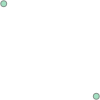

In [3]:
multipunto = sh.geometry.multipoint.MultiPoint(((-5,5),(-6,6)))
multipunto

 ### **<font color="lightblue">Líneas</font>**

<p align="justify">
Las líneas, también conocidas como curvas, están compuestas por una secuencia de puntos conectados en orden. Pueden representar caminos, rutas o cualquier otro tipo de conectividad entre puntos.


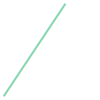

In [4]:
linea = sh.geometry.linestring.LineString(((-5 ,5), (-3 ,8)))
linea

<p align="justify">
Son objetos más complejos que los puntos y por lo tanto cuentan con una series de atributos particualres. Uno de ellos es <code>centrid</code>, que es el punto medio de la línea

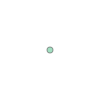

In [5]:
linea.centroid

El atributo <code>xy</code> permite ver los valores en los ejes.

In [6]:
linea.xy

(array('d', [-5.0, -3.0]), array('d', [5.0, 8.0]))

<p align="justify">
Tambien tiene como atributo el largo de la línea (<code>length</code>), que es calculado con ladistancia euclídea. Este es muy útil dado que sirve para saber qué distancia hay entre dos puntos.

In [7]:
linea.length

3.605551275463989

In [8]:
((-5+3)**2+(5-8)**2)**(1/2)

3.605551275463989

<p align="justify">
También se pueden hacer líneas más complejas que pasan por más de dos puntos, en este caso el largo sería la suma de los segmentos.

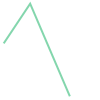

In [9]:
linea = sh.geometry.linestring.LineString(((-5 ,5), (-3 ,8), (0,1)))
linea

In [10]:
linea.length

11.221324381327898

 ### **<font color="lightblue">Multi - líneas</font>**

<p align="justify">
Las multi - líneas son una lista de líneas que se pueden juntar todas en un solo objeto. Tienen los mismos aotributos que las líneas.

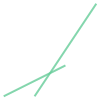

In [11]:
multilinea = sh.geometry.multilinestring.MultiLineString((((-5 ,5), (-3 ,8)),((-6 ,5), (-4 ,6))))
multilinea

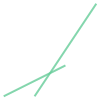

In [12]:
linea1 = sh.geometry.linestring.LineString(((-5 ,5), (-3 ,8)))
linea2 = sh.geometry.linestring.LineString(((-6 ,5), (-4 ,6)))
multilinea = sh.geometry.multilinestring.MultiLineString((linea1,linea2))
multilinea

In [13]:
multilinea.length

5.841619252963779

In [14]:
linea1.length+linea2.length

5.841619252963779

 ### **<font color="lightblue">Polígonos y multi - polígonos</font>**

<p align="justify">
Los polígonos son una serie de líneas cerradas que forman una figura geométrica plana. Pueden representar áreas como países, ciudades o cualquier región con bordes bien definidos.

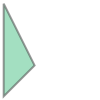

In [15]:
sh.geometry.polygon.Polygon(((1,1),(2,2),(1,4)))

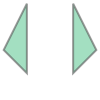

In [16]:
poli1 = sh.geometry.polygon.Polygon(((1,1),(2,2),(1,4)))
poli2 = sh.geometry.polygon.Polygon(((-1,1),(-2,2),(-1,4)))

multipoli = sh.geometry.multipolygon.MultiPolygon([poli1,poli2])
multipoli

Los polígonos tienen otros atributos más, como son el perímetro (<code>boundary</code>), el área (<code>area</code>) y los bordes(<code>bounds</code>).

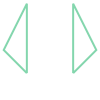

In [17]:
multipoli.boundary

In [18]:
poli1.area

1.5

In [19]:
multipoli.area

3.0

In [20]:
poli1.bounds

(1.0, 1.0, 2.0, 4.0)

In [21]:
print(poli1)

POLYGON ((1 1, 2 2, 1 4, 1 1))


 ## **<font color="lightblue">Operaciones geométricas</font>**

<p align="justify">
<code>shapely</code> ofrece una amplia gama de operaciones geométricas que permiten realizar tareas como unión, intersección, diferencia entre otras. Estas operaciones son esenciales para analizar y manipular datos espaciales.

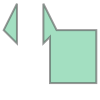

In [22]:
basepoli = sh.geometry.polygon.Polygon(((1.5,-2),(1.5,2),(5,2),(5,-2)))
basepoli.union(multipoli)

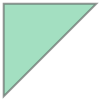

In [23]:
basepoli.intersection(multipoli)

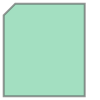

In [24]:
basepoli.difference(multipoli)

 # **<font color="lightblue">GeoPandas</font>**

<p align="justify">
Además de la funcionalidad que ofrece <code>shapely</code> para el manejo de datos espaciales, la librería <code>geopandas</code> surge como una potente herramienta que une las capacidades geométricas de <code>shapely</code> con la eficiencia y versatilidad de la tradicional biblioteca <code>pandas</code>. Esta combinación permite a los usuarios trabajar con datos geoespaciales de manera más efectiva, facilitando el análisis, la manipulación y la visualización de información espacial en entornos tabulares.
<br><br>
La principal estructura de datos que tiene <code>geopandas</code> es <code>geopandas.GeoDataFrame</code>. Esta es una subclase de <code>pandas.DataFrame</code> que puede almacenar una columna geométrica que permite realizar operaciones espaciales. La columna geométrica es un objeto de clase <code>geopandas.GeoSeries</code>, subclase de <code>pandas.Series</code>. Esto quiere decir que el <code>GeoDataFrame</code> es un conjunto de series de <code>pandas</code> más una geoserie de <code>geopandas</code>.

<a href="https://geopandas.org/en/stable/">Página web de GeoPandas</a>


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/GeoPandasFrame.png?raw=true" width="480">
</p>

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Anaconda3\envs\espacial\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(
C:\Users\Pablo\AppData\Local\Temp\ipykernel_7340\1822539265.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en

 ## **<font color="lightblue">Lectura de archivos</font>**

<p align="justify">
Los archivos que contienen datos georeferenciados no vienen en formatos .txt o .csv (excepto que traigan las coordenadas como campos, pero no es un archivo georeferenciado propiamente dicho) sino que tienen que venir en un formato específico.
<br><br>
<b>Archivos Shapefile</b>
<br><br>
Un shapefile consta de al menos tres archivos, que en conjunto conforman una capa de datos geoespaciales:
<br><br>
<ol align="justify">
<li> Archivo .shp (shape): Este es el archivo principal que contiene la geometría de los objetos espaciales, como puntos, líneas o polígonos. Cada entidad geométrica se representa con sus coordenadas $X$ e $Y$, lo que permite definir su forma y ubicación en el espacio.
<br><br>
<li>Archivo .shx (shape index): Este archivo es el índice del shapefile y almacena la ubicación de los registros en el archivo .shp. Facilita el acceso rápido y eficiente a los datos geométricos en el shapefile.
<br><br>
<li>Archivo .dbf (data attribute table): El archivo .dbf es una tabla que contiene los atributos no espaciales asociados a cada entidad geométrica del shapefile. Cada fila en la tabla representa una entidad y las columnas representan los atributos.
<br><br>
<li>Opcionalmente, un shapefile puede incluir archivos adicionales para almacenar información adicional, como metadatos, índices espaciales o proyecciones cartográficas. Estos archivos suelen tener extensiones como .prj (proyección), .sbn y .sbx (índices espaciales) entre otros.
</ol>
<p align="justify">
<b>Archivos GeoJSON</b>
<br><br>
GeoJSON es un formato de codificación de datos geoespaciales basado en JavaScript Object Notation (JSON). Este formato se ha vuelto muy popular debido a su facilidad de lectura tanto por humanos como por máquinas. Los archivos GeoJSON contienen información geográfica y atributos asociados en una estructura jerárquica de objetos y propiedades.
<br><br>
<p align="justify">
<b>Lectura de archivos en GeoPandas</b>
<br><br>
GeoPandas simplifica enormemente la lectura de archivos y la manipulación de datos geoespaciales. Para leer un shapefile en GeoPandas, simplemente utilizamos la función <code>gpd.read_file()</code> y proporcionamos la ruta al archivo .shp como argumento. GeoPandas se encarga de cargar todos los archivos relacionados y crea un <code>GeoDataFrame</code> con la información geométrica y atributos asociados.
<br><br>
En el caso de leer un GeoJson también se usa la misma función <code>gpd.read_file()</code> con la ruta de dónde se encuentra el archivo.

In [26]:
# Examinamos un conjunto de datos adjunto en la biblioteca GeoPandas, mediante lo cual adquirimos la ubicación referente a un archivo en formato .shp.
ruta = gpd.datasets.get_path('naturalearth_lowres')
ruta

'c:\\Anaconda3\\envs\\espacial\\lib\\site-packages\\geopandas\\datasets\\naturalearth_lowres\\naturalearth_lowres.shp'

In [27]:
# Leemos el archivo con la función gpd.read_file
world = gpd.read_file(ruta)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<p align="justify">
Para guardar un archivo se utiliza el método <code>GeoDataFrame.to_file()</code>. Por defecto se va guardar en formato .shp, pero se puede elegir el formato usando el parámetro <code>driver</code>.

In [28]:
world.to_file("world.shp")

In [29]:
world.to_file("world.geojson", driver = "GeoJSON")

 ## **<font color="lightblue">Proyecciones</font>**

<p align="justify">
La proyección cartográfica es un concepto fundamental en la representación de la superficie curva de la Tierra en un plano, como un mapa o una imagen. Dado que la Tierra es esférica, es imposible representar su superficie tridimensional directamente en un plano sin distorsionar ciertos aspectos geográficos.
<br><br>
Al realizar una proyección cartográfica, se busca traducir los puntos geográficos de la Tierra en coordenadas planas de manera que se pueda visualizar, medir y analizar la información geoespacial de manera práctica y comprensible. Sin embargo, debido a la naturaleza esférica de la Tierra, es inevitable que surjan distorsiones en la forma, el área, la dirección o la distancia al realizar la conversión.
<br><br>
Existen innumerables proyecciones cartográficas, cada una con sus propias características y aplicaciones específicas. Algunas proyecciones están diseñadas para preservar áreas, lo que resulta útil para comparar tamaños de regiones. Otras proyecciones buscan mantener las formas de las áreas, lo que es esencial para la navegación y el análisis de líneas de rumbo. Además, hay proyecciones que intentan conservar las direcciones, lo que es valioso para determinar la orientación precisa de un punto con respecto a otro.
<br><br>
En general las proyecciones del mundo se pueden dividir en tres familias: proyecciones cilíndricas, proyecciones cónicas y proyecciones planas.



<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/proyecciones.png?raw=true" width="980">
</p>

 ## **<font color="lightblue">Sistema de Referencia de Coordenadas (CRS): La clave para ubicar puntos en el espacio</font>**


<p align="justify">
Las proyecciones se defines con el sistema de referencia de coordenadas, que es un sistema establecidoque nos permite saber con qué proyección estamos realizando nuestro análisis.
<br><br>
El Sistema de Referencia de Coordenadas (CRS) es un componente esencial en el manejo de datos geoespaciales y representa la forma en que se asignan las coordenadas a puntos, líneas y polígonos en la superficie de la Tierra. El CRS proporciona un marco de referencia que permite ubicar y representar objetos geográficos de manera precisa y coherente en un sistema de coordenadas específico.
<br><br>
EL CRS es un atributo que va tener el GeoDataFrame que estemos trabajando, si es que el mismo está proyectado.


In [30]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<p align="justify">
Para tener una referencia de los diferentes CRS que se pueden utilizar hay que visitar la página <a href="https://spatialreference.org/">https://spatialreference.org/</a> .
<br><br>
Para referencia, aquí estan algunas proyecciones de las más comunes y sus códigos EPSG:
<ul align="justify">
<br><li>WGS 84 latitud/longitud: EPSG: 4326
<br><br><li>Zonas UTM(Norte): EPSG:32633
<br><br><li>Zonas UTM(Sur): EPSG:32733
<br><br><li>Google Mercator: EPSG:3857
<br><br><li>Posgar 98/ Argentina : EPSG: 22177
</ul>
<br>
<p align="justify">
GeoPandas permite reproyectar nuestro conjunto de datos geográfico con el método <code>GeoSeries.to_crs()</code> o directamnete modificando el atributo <code>GeoSeries.crs</code>. Para nombrar el CRS deseado se puede utilizar el nombre, en formato texto "EPSG:4326", directamente se le puede atribuir el EPSG (European Petroleum Survey Group) o se puede usar el código ESRI (Environmental Systems Research Institute) de la siguiente forma "ESRI:54009".






In [31]:
world1 = world.to_crs("World Robinson")
world2 = world.to_crs("ESRI:54009")


<AxesSubplot:>

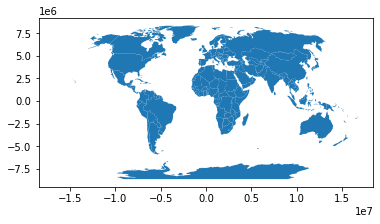

In [32]:
world1.plot()

Observemos las diferencias que tenemos visualizando los mapas con el método <code>GeoDataFrame.plot()</code>.

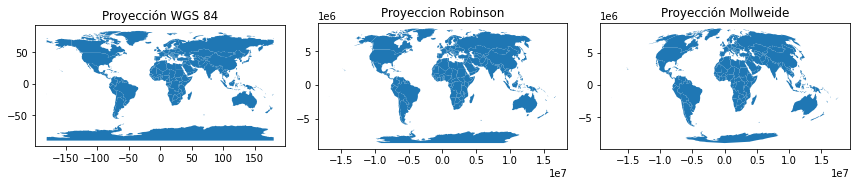

In [33]:
# Crea una figura con 2 filas y 2 columnas para los subplots
fig, ax = plt.subplots(1,3, figsize=(12, 10))

# Grafica el primer GeoDataFrame en el primer subplot (fila 0, columna 0)
world.plot(ax=ax[0])
ax[0].set_title("Proyección WGS 84")

# Grafica el segundo GeoDataFrame en el segundo subplot (fila 0, columna 1)
world1.plot(ax=ax[1])
ax[1].set_title("Proyeccion Robinson")

# Grafica el tercer GeoDataFrame en el tercer subplot (fila 1, columna 0)
world2.plot(ax=ax[2])
ax[2].set_title("Proyección Mollweide")

# Ajusta los espacios entre los subplots para una mejor presentación
plt.tight_layout()

# Muestra el gráfico resultante
plt.show()


In [34]:
world1.crs

<Derived Projected CRS: ESRI:54030>
Name: World_Robinson
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Robinson
- method: Robinson
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

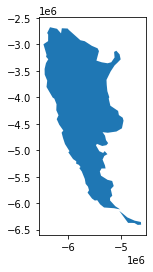

In [35]:
world2.query("name == 'Argentina'").plot()

<AxesSubplot:>

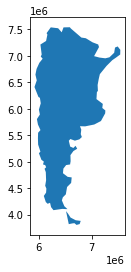

In [36]:
world.query("name == 'Argentina'").to_crs(epsg = 22177).plot()

<p align="justify">
La proyección también influye cuando queremos calcular distancias o áreas. En el caso del crs en el que está el dataset world (WGS 84) se encuentra medido en grados, por lo tanto calcular distancias no va ser correcto en ese dataframe y bajo las otras también puede variar. Veamos un ejemplo para Argentina.

In [37]:
world.query("name == 'Argentina'").area

C:\Users\Pablo\AppData\Local\Temp\ipykernel_7340\2942312048.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world.query("name == 'Argentina'").area


9    278.923392
dtype: float64

In [38]:
world1.query("name == 'Argentina'").area/(1000**2) # dividimos para que nos quede en km^2


9    2.623326e+06
dtype: float64

In [39]:
world2.query("name == 'Argentina'").area/(1000**2)

9    2.790478e+06
dtype: float64

In [40]:
world2.query("name == 'Argentina'").to_crs(epsg = 22177).area/1000**2

9    2.858347e+06
dtype: float64

 # **<font color="lightblue">Conclusiones</font>**

<p align="justify">
En este colab:<br><br>
✅
Aprendimos como crear objetos geométricos y manipularlos con <code>shapely</code>. <br>
✅ Leimos archivos geográficos externos con <code>GeoPandas</code>. <br>✅ Aprendimos a proyectar un dataset y para que sirve el CRS. <br>

<p align="justify">

